# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Lending Club Project


**Harvard University**<br/>
**Fall 2018**<br/>

<hr style="height:2pt">



In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [183]:
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs

from sklearn.preprocessing import StandardScaler
import time

import math
from scipy.special import gamma

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns
sns.set()
import matplotlib.style
matplotlib.style.use('seaborn-whitegrid')
sns.set_style("white")
from IPython.display import display

<hr style="height:2pt">

<div class='theme'> Overview </div>

### This notebook contains the following sections:
* **Part 1**: Reading in the data set
* **Part 2**: Further reducing number of predictors
* **Part 3**: Encoding categorical variables
* **Part 4**: Exploring the data

<div class='exercise'><b> Part 1: Reading in the data set </b></div>


This notebook uses the cleaned CSV data file `data_cleaned_2016_2017.csv` downloaded from https://drive.google.com/open?id=1LCk-dDFC7O_6ek1i0IIGqE07Rq-kf1Xz. <br><br>

In [3]:
# increase some display options to display all columns and more rows.
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 150

In [154]:
# read in the 2016-2017 data set
df = pd.read_csv('data/data_cleaned_2016_2017.csv', low_memory = False)

In [155]:
display(df.shape)
df.head()

(334109, 92)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,14000.0,14000.0,14000.0,1,15.99,340.38,C,C5,10.0,RENT,43000.0,Source Verified,2017,Charged Off,0,debt_consolidation,367xx,AL,21.80,1.0,1995,0.0,1,0,3.0,0.0,18537.0,99.1,8.0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,8035.0,42.0,0.0,0.0,18537.0,70.0,0.0,0.0,0.0,0.0,8857.0,163.0,99.1,0.0,0.0,1,1,1,1,0.0,1,0,0,0,0.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,87.5,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5000.0,5000.0,5000.0,0,14.99,173.31,C,C4,10.0,RENT,68000.0,Not Verified,2017,Fully Paid,0,debt_consolidation,945xx,CA,22.50,0.0,2003,0.0,1,0,6.0,0.0,10276.0,90.1,18.0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1,25892.0,64.0,0.0,0.0,4261.0,69.0,1.0,1.0,0.0,2.0,6028.0,1124.0,90.1,0.0,0.0,1,1,1,1,0.0,1,0,1,0,0.0,4.0,4.0,4.0,6.0,8.0,4.0,9.0,4.0,6.0,0.0,0.0,0.0,0.0,94.4,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,10150.0,10150.0,10150.0,0,7.24,314.52,A,A3,8.0,MORTGAGE,50000.0,Not Verified,2017,Fully Paid,0,debt_consolidation,773xx,TX,29.60,0.0,2002,1.0,0,0,9.0,0.0,21845.0,56.0,21.0,1,0,0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,1,23502.0,43.0,0.0,0.0,11270.0,49.0,1.0,1.0,2.0,2.0,29908.0,13951.0,58.2,0.0,0.0,1,1,1,1,3.0,1,0,1,0,0.0,3.0,4.0,3.0,5.0,8.0,5.0,10.0,4.0,9.0,0.0,0.0,0.0,2.0,100.0,33.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8400.0,8400.0,8400.0,0,11.39,276.56,B,B3,8.0,MORTGAGE,50000.0,Source Verified,2017,Charged Off,0,other,454xx,OH,15.63,0.0,2005,0.0,0,0,14.0,0.0,12831.0,30.3,30.0,1,0,0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,1,38760.0,105.0,4.0,8.0,5338.0,65.0,4.0,1.0,7.0,10.0,12389.0,24145.0,33.1,0.0,0.0,1,1,1,1,4.0,1,0,1,0,0.0,4.0,5.0,7.0,11.0,9.0,11.0,16.0,5.0,14.0,0.0,0.0,0.0,5.0,100.0,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,10000.0,10000.0,10000.0,0,12.74,335.69,C,C1,10.0,OWN,40000.0,Not Verified,2017,Fully Paid,0,debt_consolidation,324xx,FL,8.85,0.0,1997,0.0,0,0,7.0,0.0,9227.0,55.9,15.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,3.0,5454.0,56.0,0.0,0.0,1.0,3.0,1318.0,1691.0,79.4,0.0,0.0,1,1,1,1,2.0,1,0,1,0,0.0,2.0,4.0,2.0,3.0,2.0,7.0,11.0,4.0,7.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [121]:
# show all predictors that still have at least one NaN
def show_NaN(df):
    check_isna = df.isna().sum()
    for i in zip(check_isna.index, check_isna.values):
        if i[1] != 0:
            print(i)

In [122]:
# just checking
show_NaN(df)

<div class='exercise'><b> Part 2: Reducing number of predictors </b></div>


In [156]:
cols_to_remove = []

In [157]:
# recode loan_status, otherwise it will cause problems when running models later
df['loan_status'] = df['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
np.int64(df['loan_status'])

array([0, 1, 1, ..., 0, 1, 0])

In [158]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334109 entries, 0 to 334108
Data columns (total 92 columns):
loan_amnt                              334109 non-null float64
funded_amnt                            334109 non-null float64
funded_amnt_inv                        334109 non-null float64
term                                   334109 non-null int64
int_rate                               334109 non-null float64
installment                            334109 non-null float64
grade                                  334109 non-null object
sub_grade                              334109 non-null object
emp_length                             334109 non-null float64
home_ownership                         334109 non-null object
annual_inc                             334109 non-null float64
verification_status                    334109 non-null object
issue_d                                334109 non-null int64
loan_status                            334109 non-null int64
pymnt_plan       

We can now manually analyze and check some of the predictors and remove those with values that don't make much sense for predictions or values that are highly correlated with other predictors.

* Remove the following variables, since they all only have one single value of "1" which doesn't seem very useful for predictions.
    * `mo_sin_old_il_acct`
    * `mo_sin_old_rev_tl_op`
    * `mo_sin_rcnt_rev_tl_op`
    * `mo_sin_rcnt_tl`

In [126]:
display(df.groupby('mo_sin_old_il_acct').sum())
display(df.groupby('mo_sin_old_rev_tl_op').sum())
display(df.groupby('mo_sin_rcnt_rev_tl_op').sum())
display(df.groupby('mo_sin_rcnt_tl').sum())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
mo_sin_old_il_acct,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.837196e+09,4.837196e+09,4.835329e+09,77796,4.565335e+06,1.489619e+08,1875779.0,2.643609e+10,673675920,255116,0,6250986.08,112284.0,668210186,204960.0,173313,67877,3957858.0,87127.0,5.295816e+09,15917544.9,8357992.0,251163,96671,11775,1.348519e+09,220488.72,1993.0,360732.0,941853.0,269447.0,603192.0,326057,1.211699e+10,20976263.0,487904.0,1030092.0,1.844071e+09,19646113.0,371451.0,555624.0,799343.0,1732944.0,4.666634e+09,3.808621e+09,18194554.3,3158.0,7498603.0,334109,334109,334109,533374.0,330318,82705,305417,117667,186598.0,1188390.0,1834698.0,1593837.0,2572851.0,2992083.0,2773925.0,4752615.0,1807938.0,3940603.0,327.0,1258.0,30389.0,806970.0,3.138688e+07,13071194.5,54040.0,21257.0,200957246.0,5300.0,11437.0,75551.0,381870.5,19678.0,86506.0,406.0,649.0,2417


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
mo_sin_old_rev_tl_op,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.837196e+09,4.837196e+09,4.835329e+09,77796,4.565335e+06,1.489619e+08,1875779.0,2.643609e+10,673675920,255116,0,6250986.08,112284.0,668210186,204960.0,173313,67877,3957858.0,87127.0,5.295816e+09,15917544.9,8357992.0,251163,96671,11775,1.348519e+09,220488.72,1993.0,360732.0,941853.0,269447.0,603192.0,326057,1.211699e+10,20976263.0,487904.0,1030092.0,1.844071e+09,19646113.0,371451.0,555624.0,799343.0,1732944.0,4.666634e+09,3.808621e+09,18194554.3,3158.0,7498603.0,334109,334109,334109,533374.0,330318,82705,305417,117667,186598.0,1188390.0,1834698.0,1593837.0,2572851.0,2992083.0,2773925.0,4752615.0,1807938.0,3940603.0,327.0,1258.0,30389.0,806970.0,3.138688e+07,13071194.5,54040.0,21257.0,200957246.0,5300.0,11437.0,75551.0,381870.5,19678.0,86506.0,406.0,649.0,2417


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
mo_sin_rcnt_rev_tl_op,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.837196e+09,4.837196e+09,4.835329e+09,77796,4.565335e+06,1.489619e+08,1875779.0,2.643609e+10,673675920,255116,0,6250986.08,112284.0,668210186,204960.0,173313,67877,3957858.0,87127.0,5.295816e+09,15917544.9,8357992.0,251163,96671,11775,1.348519e+09,220488.72,1993.0,360732.0,941853.0,269447.0,603192.0,326057,1.211699e+10,20976263.0,487904.0,1030092.0,1.844071e+09,19646113.0,371451.0,555624.0,799343.0,1732944.0,4.666634e+09,3.808621e+09,18194554.3,3158.0,7498603.0,334109,334109,334109,533374.0,330318,82705,305417,117667,186598.0,1188390.0,1834698.0,1593837.0,2572851.0,2992083.0,2773925.0,4752615.0,1807938.0,3940603.0,327.0,1258.0,30389.0,806970.0,3.138688e+07,13071194.5,54040.0,21257.0,200957246.0,5300.0,11437.0,75551.0,381870.5,19678.0,86506.0,406.0,649.0,2417


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
mo_sin_rcnt_tl,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.837196e+09,4.837196e+09,4.835329e+09,77796,4.565335e+06,1.489619e+08,1875779.0,2.643609e+10,673675920,255116,0,6250986.08,112284.0,668210186,204960.0,173313,67877,3957858.0,87127.0,5.295816e+09,15917544.9,8357992.0,251163,96671,11775,1.348519e+09,220488.72,1993.0,360732.0,941853.0,269447.0,603192.0,326057,1.211699e+10,20976263.0,487904.0,1030092.0,1.844071e+09,19646113.0,371451.0,555624.0,799343.0,1732944.0,4.666634e+09,3.808621e+09,18194554.3,3158.0,7498603.0,334109,334109,334109,533374.0,330318,82705,305417,117667,186598.0,1188390.0,1834698.0,1593837.0,2572851.0,2992083.0,2773925.0,4752615.0,1807938.0,3940603.0,327.0,1258.0,30389.0,806970.0,3.138688e+07,13071194.5,54040.0,21257.0,200957246.0,5300.0,11437.0,75551.0,381870.5,19678.0,86506.0,406.0,649.0,2417


In [159]:
cols_to_remove += ['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
                   'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']

We can use the pd.DataFrame.corr() function to find correlations between variables. A value of 1.0 means the variables are perfectly correlated and a value of 0 means they're not correlated at all. We can then further inspect the ones with for instance a value of $> 0.5$.

In [160]:
correlations = df.corr()

In [162]:
threshold = 0.9

# display entire matrix and color in red if predictors > threshold
#correlations.style.apply(lambda x: ["background: red" if v > threshold else "" for v in x], axis = 1)

# this only shows sub dataframes for predictors that meet the criterion and ignores others
for col in correlations:
    display(correlations.loc[lambda x: x[col] > threshold, lambda y: y[col] > threshold])

,loan_amnt,funded_amnt,funded_amnt_inv,installment
loan_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt_inv,0.999993,0.999993,1.000000,0.955109
installment,0.955203,0.955203,0.955109,1.000000


,loan_amnt,funded_amnt,funded_amnt_inv,installment
loan_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt_inv,0.999993,0.999993,1.000000,0.955109
installment,0.955203,0.955203,0.955109,1.000000


,loan_amnt,funded_amnt,funded_amnt_inv,installment
loan_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt_inv,0.999993,0.999993,1.000000,0.955109
installment,0.955203,0.955203,0.955109,1.000000


,term
term,1.0


,int_rate
int_rate,1.0


,loan_amnt,funded_amnt,funded_amnt_inv,installment
loan_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt,1.000000,1.000000,0.999993,0.955203
funded_amnt_inv,0.999993,0.999993,1.000000,0.955109
installment,0.955203,0.955203,0.955109,1.000000


,emp_length
emp_length,1.0


,annual_inc
annual_inc,1.0


,issue_d
issue_d,1.0


,loan_status
loan_status,1.0


""


,dti
dti,1.0


,delinq_2yrs
delinq_2yrs,1.0


,earliest_cr_line
earliest_cr_line,1.0


,inq_last_6mths
inq_last_6mths,1.0


,mths_since_last_delinq
mths_since_last_delinq,1.0


,mths_since_last_record
mths_since_last_record,1.0


,open_acc,num_sats
open_acc,1.000000,0.998662
num_sats,0.998662,1.000000


,pub_rec
pub_rec,1.0


,revol_bal
revol_bal,1.0


,revol_util
revol_util,1.0


,total_acc
total_acc,1.0


,initial_list_status
initial_list_status,1.0


,mths_since_last_major_derog
mths_since_last_major_derog,1.0


,application_type,annual_inc_joint,dti_joint
application_type,1.000000,0.900298,0.925836
annual_inc_joint,0.900298,1.000000,0.803658
dti_joint,0.925836,0.803658,1.000000


,application_type,annual_inc_joint
application_type,1.000000,0.900298
annual_inc_joint,0.900298,1.000000


,application_type,dti_joint
application_type,1.000000,0.925836
dti_joint,0.925836,1.000000


,acc_now_delinq
acc_now_delinq,1.0


,open_acc_6m
open_acc_6m,1.0


,open_act_il
open_act_il,1.0


,open_il_12m
open_il_12m,1.0


,open_il_24m
open_il_24m,1.0


,mths_since_rcnt_il
mths_since_rcnt_il,1.0


,total_bal_il
total_bal_il,1.0


,il_util
il_util,1.0


,open_rv_12m
open_rv_12m,1.0


,open_rv_24m
open_rv_24m,1.0


,max_bal_bc
max_bal_bc,1.0


,all_util
all_util,1.0


,inq_fi
inq_fi,1.0


,total_cu_tl
total_cu_tl,1.0


,inq_last_12m
inq_last_12m,1.0


,acc_open_past_24mths
acc_open_past_24mths,1.0


,avg_cur_bal
avg_cur_bal,1.0


,bc_open_to_buy
bc_open_to_buy,1.0


,bc_util
bc_util,1.0


,chargeoff_within_12_mths
chargeoff_within_12_mths,1.0


,delinq_amnt
delinq_amnt,1.0


""


""


""


""


,mort_acc
mort_acc,1.0


,mths_since_recent_bc
mths_since_recent_bc,1.0


,mths_since_recent_bc_dlq
mths_since_recent_bc_dlq,1.0


,mths_since_recent_inq
mths_since_recent_inq,1.0


,mths_since_recent_revol_delinq
mths_since_recent_revol_delinq,1.0


,num_accts_ever_120_pd
num_accts_ever_120_pd,1.0


,num_actv_bc_tl
num_actv_bc_tl,1.0


,num_actv_rev_tl,num_rev_tl_bal_gt_0
num_actv_rev_tl,1.000000,0.975518
num_rev_tl_bal_gt_0,0.975518,1.000000


,num_bc_sats
num_bc_sats,1.0


,num_bc_tl
num_bc_tl,1.0


,num_il_tl
num_il_tl,1.0


,num_op_rev_tl
num_op_rev_tl,1.0


,num_rev_accts
num_rev_accts,1.0


,num_actv_rev_tl,num_rev_tl_bal_gt_0
num_actv_rev_tl,1.000000,0.975518
num_rev_tl_bal_gt_0,0.975518,1.000000


,open_acc,num_sats
open_acc,1.000000,0.998662
num_sats,0.998662,1.000000


,num_tl_120dpd_2m
num_tl_120dpd_2m,1.0


,num_tl_30dpd
num_tl_30dpd,1.0


,num_tl_90g_dpd_24m
num_tl_90g_dpd_24m,1.0


,num_tl_op_past_12m
num_tl_op_past_12m,1.0


,pct_tl_nvr_dlq
pct_tl_nvr_dlq,1.0


,percent_bc_gt_75
percent_bc_gt_75,1.0


,pub_rec_bankruptcies
pub_rec_bankruptcies,1.0


,tax_liens
tax_liens,1.0


,revol_bal_joint
revol_bal_joint,1.0


,sec_app_inq_last_6mths
sec_app_inq_last_6mths,1.0


,sec_app_mort_acc
sec_app_mort_acc,1.0


,sec_app_open_acc,sec_app_num_rev_accts
sec_app_open_acc,1.000000,0.918398
sec_app_num_rev_accts,0.918398,1.000000


,sec_app_revol_util
sec_app_revol_util,1.0


,sec_app_open_act_il
sec_app_open_act_il,1.0


,sec_app_open_acc,sec_app_num_rev_accts
sec_app_open_acc,1.000000,0.918398
sec_app_num_rev_accts,0.918398,1.000000


,sec_app_chargeoff_within_12_mths
sec_app_chargeoff_within_12_mths,1.0


,sec_app_collections_12_mths_ex_med
sec_app_collections_12_mths_ex_med,1.0


,sec_app_mths_since_last_major_derog
sec_app_mths_since_last_major_derog,1.0


In [163]:
def make_scatterplot(x, y):
    fig = plt.figure(figsize=(8,5))
    plt.scatter(x, y, alpha=0.8)
    plt.title('Compare two variables', fontsize=16)
    plt.xlabel(x.name, fontsize=14)
    plt.ylabel(y.name, fontsize=14)
    plt.legend(loc='best')
    plt.show()

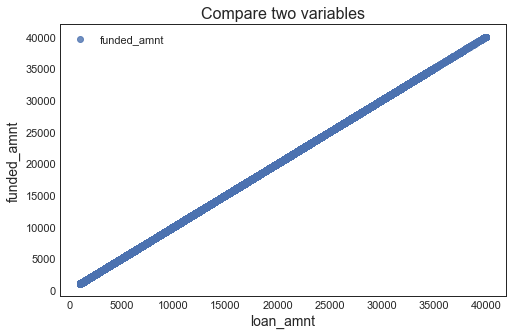

None

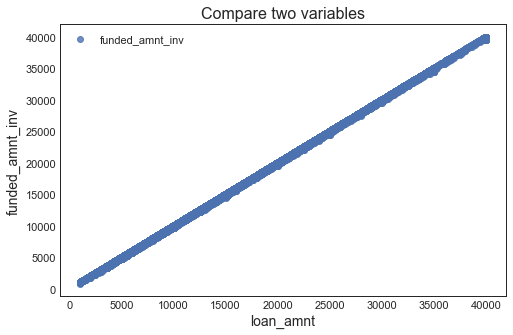

None

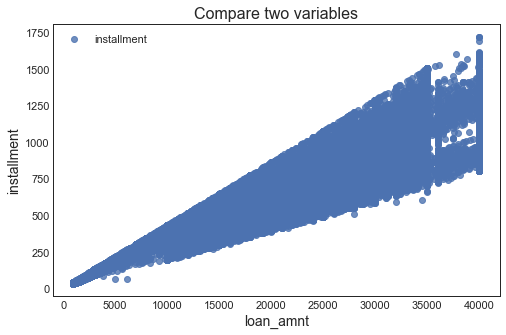

None

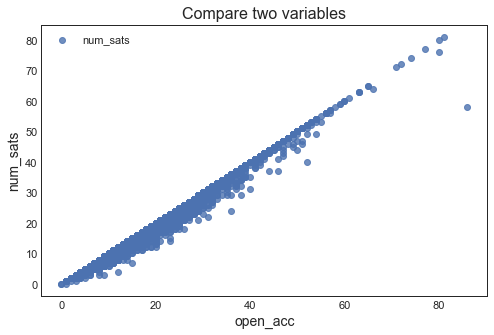

None

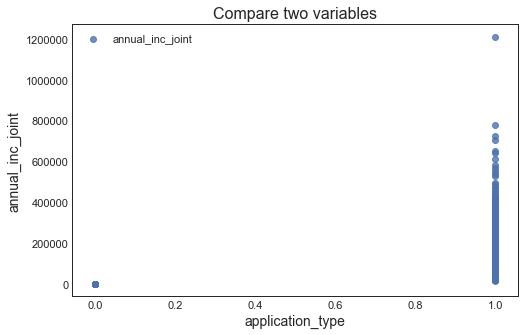

None

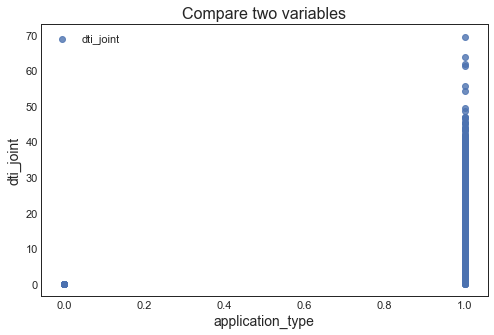

None

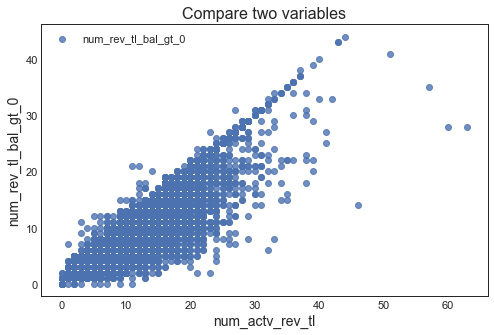

None

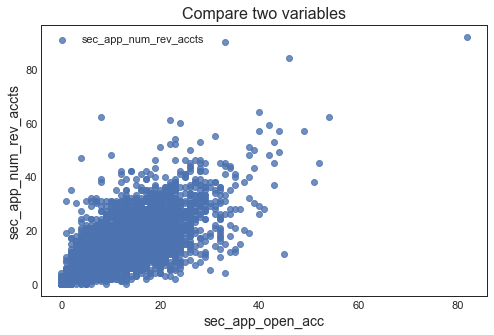

None

In [130]:
# When comparing predictors we can see that some of them are very correlated, those might be removed from the data.
display(make_scatterplot(df['loan_amnt'], df['funded_amnt']))
display(make_scatterplot(df['loan_amnt'], df['funded_amnt_inv']))
display(make_scatterplot(df['loan_amnt'], df['installment']))
display(make_scatterplot(df['open_acc'], df['num_sats']))
display(make_scatterplot(df['application_type'], df['annual_inc_joint']))
display(make_scatterplot(df['application_type'], df['dti_joint']))
display(make_scatterplot(df['num_actv_rev_tl'], df['num_rev_tl_bal_gt_0']))
display(make_scatterplot(df['sec_app_open_acc'], df['sec_app_num_rev_accts']))

* Based on the above analysis we can probably also remove the following columns, due to them being highly correlated:<br>
    * `funded_amnt`
    * `funded_amnt_inv`
    * `installment`
    * `num_sats`
    * `application_type` (application type is redundant, sec_ and _joint varuables already hold that information)
    * `num_actv_rev_tl`
    * `sec_app_num_rev_accts`

In [164]:
cols_to_remove += ['funded_amnt', 'funded_amnt_inv', 
                   'installment', 'num_sats', 
                   'application_type', 'num_actv_rev_tl', 
                   'sec_app_num_rev_accts']

In [165]:
df = df.drop(columns=cols_to_remove)
df.shape

(334109, 81)

<div class='exercise'><b> Part 3: Encoding categorical variables </b></div>


Encode ordinal and nominal categorical variables (e.g. grade and sub_grade):

In [166]:
object_columns = []
for column in df:
    if df[column].dtype == 'object':
        object_columns.append(column)
object_columns

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'zip_code',
 'addr_state']

For zip code we'll just drop the last two `xx`:

In [167]:
df["zip_code"] = [x.strip("xx") for x in df["zip_code"].astype(str)]
df["zip_code"] = df["zip_code"].astype(int)

In [170]:
def encode(df):
    
    result = df.copy()
    # ordinal columns are encoded as numerical values, as there is an order
    result["grade"].replace({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}, inplace = True)
    result["sub_grade"].replace({"A1": 11, "A2": 12, "A3": 13, "A4": 14, "A5": 15,
                            "B1": 21, "B2": 22, "B3": 23, "B4": 24, "B5": 25,
                            "C1": 31, "C2": 32, "C3": 33, "C4": 34, "C5": 35,
                            "D1": 41, "D2": 42, "D3": 43, "D4": 44, "D5": 45,
                            "E1": 51, "E2": 52, "E3": 53, "E4": 54, "E5": 55,
                            "F1": 61, "F2": 62, "F3": 63, "F4": 64, "F5": 65,
                            "G1": 71, "G2": 72, "G3": 73, "G4": 74, "G5": 75}, inplace = True)

    # nominal columns are encoded via hot encoding by adding more columns
    nominal_columns = ['home_ownership', 'verification_status', 'purpose', 'addr_state']
    prefixes = ['home', 'verify', 'purp', 'state']
    result = pd.get_dummies(result, columns=nominal_columns, prefix=prefixes, drop_first=True)

    return result

In [175]:
df_encoded = encode(df)

In [178]:
df_encoded.info(memory_usage='deep', max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334109 entries, 0 to 334108
Data columns (total 144 columns):
loan_amnt                              334109 non-null float64
term                                   334109 non-null int64
int_rate                               334109 non-null float64
grade                                  334109 non-null int64
sub_grade                              334109 non-null int64
emp_length                             334109 non-null float64
annual_inc                             334109 non-null float64
issue_d                                334109 non-null int64
loan_status                            334109 non-null int64
pymnt_plan                             334109 non-null int64
zip_code                               334109 non-null int64
dti                                    334109 non-null float64
delinq_2yrs                            334109 non-null float64
earliest_cr_line                       334109 non-null int64
inq_last_6mths        

<div class='exercise'><b> Part 4: Exploring the data </b></div>


We can now start to explore the data and check for "significant" predictors. First we create training and test sets and then we fit some models to see what important predictors would be according to those models.

In [180]:
data_train, data_test = train_test_split(df_encoded, test_size=.2, stratify=df_encoded['loan_status'], random_state=42)

In [181]:
X_train = sm.add_constant(data_train.drop('loan_status', axis=1))
X_test = sm.add_constant(data_test.drop('loan_status', axis=1))
y_train = data_train['loan_status'].values.reshape(-1,1)
y_test = data_test['loan_status'].values.reshape(-1,1)

In [250]:
alphas = (.1,.5,1,5,10,50,100)
fitted_lasso = LassoCV(alphas=alphas, max_iter=100000).fit(X_train, y_train)

In [258]:
print("Relevant variables according to variable selection via Lasso:\n")

result = {}

for index, val in enumerate(fitted_lasso.coef_):
    if fitted_lasso.coef_[index] != 0:
        result[fitted_lasso.coef_[index]] = df_encoded.columns[index]
        
for key in sorted(result.keys(), reverse=True) :
    print(key , ":" , result[key])


Relevant variables according to variable selection via Lasso:

1.5898069229444693e-05 : zip_code
2.5809898507209743e-06 : max_bal_bc
2.1004068005641044e-06 : avg_cur_bal
7.178401324895233e-07 : bc_open_to_buy
4.02753165392457e-07 : annual_inc_joint
6.946058465279592e-08 : issue_d
3.9495463521242446e-08 : total_bal_il
-1.1983619556143076e-07 : revol_bal
-1.7409503683265427e-07 : revol_bal_joint
-2.481995540002082e-06 : delinq_amnt
-3.1462280961039715e-06 : term
-0.00011489687164249407 : all_util
-0.0002654278948882494 : percent_bc_gt_75
-0.000364703059118014 : revol_util
-0.0007150434011101827 : dti
-0.00691661541557217 : emp_length


Run another check using a Decision Tree and the feature importance to check which variables are important (strong predictors).

In [273]:
tree = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
feature_importance = tree.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
index_sorted = np.argsort(feature_importance)

In [275]:
print("Relevant variables according to variable selection via feature importance using Decision Tree:\n")

result = {}

for index in index_sorted:
    if feature_importance[index] != 0:
        result[feature_importance[index]] = X_train.columns[index]
        
for key in sorted(result.keys(), reverse=True) :
    print(key , ":" , result[key])

Relevant variables according to variable selection via feature importance using Decision Tree:

100.0 : int_rate
41.25756155617139 : sub_grade
16.571205843870633 : avg_cur_bal
8.895773530422199 : dti
8.095515918601944 : issue_d
7.548941509252526 : loan_amnt
4.953723007381098 : emp_length
4.621661424896769 : revol_util
3.8519904110266743 : bc_open_to_buy
3.4603201641091346 : num_rev_tl_bal_gt_0
3.0615582340763994 : annual_inc
3.0413968421140005 : zip_code
2.682387355009809 : all_util
2.613425370029572 : mort_acc
2.2507480549568424 : total_acc
2.215771136780761 : home_RENT
2.043746794251402 : max_bal_bc
2.0029026725762646 : bc_util
1.7466952456346478 : earliest_cr_line
1.6586949708033243 : total_bal_il
1.4396104976439095 : revol_bal
1.3715531195266324 : num_il_tl
1.3343435485011619 : home_MORTGAGE
1.3229498280245735 : percent_bc_gt_75
1.175835033697659 : term
1.1617422306500116 : open_rv_24m
1.1477620582616668 : num_rev_accts
1.1059861716290884 : pct_tl_nvr_dlq
1.030774890633004 : num_ac

In [269]:
# the accuracy score is also fairly decent.
accuracy_score(tree.predict(X_test), y_test)

0.7625332974170184